In [1]:
import pandas as pd
import cv2,os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

## CSVファイル読み込み
`annotation_ver5_train.csv`  元画像の訓練画像  
`annotation_ver5_train_label.csv`  訓練画像に対応する教師画像  
`annotation_ver5_test.csv` 元画像のテスト画像  
`annotation_ver5_test_label.csv` テスト画像に対応する教師画像

In [44]:
#df = pd.read_csv('annotation_ver5_test.csv', header=None)
df = pd.read_csv('annotation_ver5_train_label.csv', header=None)

In [45]:
df.columns=['','', 'path', 'min_x', 'min_y', 'max_x', 'max_y','size_x', 'size_y', 'label', 'cut_path']

In [46]:
df.head(3)

,,,path,min_x,min_y,max_x,max_y,width,height,正解ラベル,cut_path
0,6,6,K:\OriginalImage-all\Cra006.JPG,249,1,326,450,600,450,Crack,K:\OriginalImage-all\Cra006.JPG
1,15,15,K:\OriginalImage-all\Cra015.JPG,281,1,367,450,600,450,Crack,K:\OriginalImage-all\Cra015.JPG
2,19,17,K:\OriginalImage-all\Cra017.JPG,273,1,368,379,600,450,Crack,K:\OriginalImage-all\Cra017.JPG


In [47]:
path = df[['path']].loc[:,'path']
start_x = df[['min_x']].loc[:,'min_x']
start_y = df[['min_y']].loc[:,'min_y']
end_x = df[['max_x']].loc[:,'max_x']
end_y = df[['max_y']].loc[:,'max_y']
label = df[['label']].loc[:,'label']

In [48]:
path[0]

'K:\\OriginalImage-all\\Cra006.JPG'

In [49]:
path[0][:-4]

'K:\\OriginalImage-all\\Cra006'

In [50]:
len(path)

286

In [51]:
NUM=1

In [52]:
img = cv2.imread(path[NUM])

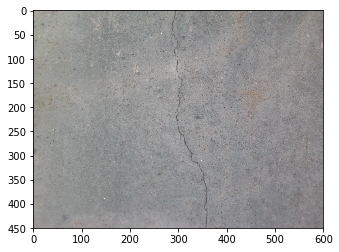

In [53]:
plt.imshow(img)

In [54]:
os.path.basename(path[0])[:-4]

'Cra006'

In [55]:
root, ext = os.path.splitext(path[0])
print("root\t"+ root)
print("ext\t" + ext)

root	K:\OriginalImage-all\Cra006
ext	.JPG


## 切り取り画像を保存するフォルダ
元画像の訓練画像を切り取るとき `20191205 -> CropTrainImage`  
訓練画像に対応する教師画像を切り取るとき `20191205 -> CropTrainLabel`  
元画像のテスト画像を切り取るとき `20191205 -> CropTestImage`  
テスト画像に対応する教師画像を切り取るとき `20191205 -> CropTestLabel`  

In [56]:
#SaveDir = os.path.join("20191129","CropTestLabel")
SaveDir = os.path.join("20191206", "CropTrainLabel")

In [57]:
for i in range(len(path)):
    img = cv2.imread(path[i])
    root, ext = os.path.splitext(path[i])
    
    #ひびわれのみ正方形にトリミングする
    if label == 'Crack':
        width = end_x - start_x
        height = end_y - start _y
        
        if width > height:
            tmp = ((end_x - start_x) - (end_y - start_y)) / 2
            start_y = start_y - tmp
            end_y = end_y + tmp
        else:
            tmp = ((end_y - start_y) - (end_x - start_x)) / 2
            start_x = start_x - tmp
            end_x = end_x + tmp
    
    cut_img = img[start_y[i]:end_y[i], start_x[i]:end_x[i]]
    
    if i==0:
        count = 1
    else:
        if path[i] == path[i-1]:
            count += 1
        else:
            count = 1
        
    cv2.imwrite(SaveDir + '/' +  os.path.basename(path[i])[:-4] +'_crop'+ str(count) + ext, cut_img)